# **Fuzzy Logic - Rekomendasi Restoran**

Kelompok 1:


1.   Hanvito Michael Lee - 1301190090
2.   Kurniadi Ahmad Wijaya - 1301194024 
3.   Naufal Haritsah Luthfi - 1301194073



In [548]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Membaca File Dataset**

In [549]:
data = pd.read_excel("https://github.com/ShinyQ/Tugas-Pengantar-AI-2_Fuzzy_Logic/blob/main/restoran.xlsx?raw=true")
data.sample(8)

,id,pelayanan,makanan
12,13,80,3
3,4,52,4
77,78,20,1
10,11,10,5
35,36,32,6
51,52,94,3
76,77,11,10
90,91,98,3


# **Fuzzifikasi**

## **Membership Function**

#### **Fungsi Keanggotaan Makanan**
##### 1 - 3  = Tidak Enak
##### 4 - 6  = Biasa
##### 7 - 8  = Enak
##### 9 - 10 = Sangat Enak 

In [550]:
def fuzzy_makanan(x):
    makanan = {'Tidak Enak': 0, 'Biasa': 0, 'Enak': 0, 'Sangat Enak': 0}

    a, b, c, d, e, f = 3, 4, 6, 7, 8, 9

    # Garis Datar
    if x <= a:
        makanan['Tidak Enak'] = 1
    if b <= x <= c:
        makanan['Biasa'] = 1
    if d <= x <= e:
        makanan['Enak'] = 1
    if x >= f:
        makanan['Sangat Enak'] = 1
    
    # Garis Miring (Gradient)
    if a < x <= b:
        makanan['Tidak Enak'] = -(x - b) / (b - a)
    if a < x < b:
        makanan['Biasa'] = (x - a) / (b - a)
    if c < x <= d:
        makanan['Biasa'] = -(x - d) / (d - c)
    if c < x < d:
        makanan['Enak'] = (x - c) / (d - c)
    if e < x < f:
        makanan['Enak'] = -(x - f) / (f - e)
    if e < x <= f:
        makanan['Sangat Enak'] = (x - e) / (f - e)
        
    return makanan

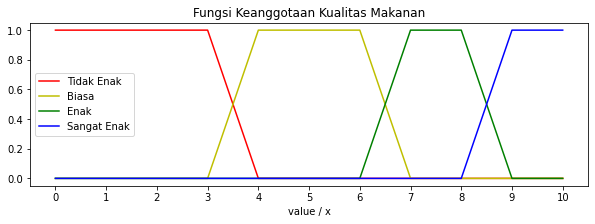

In [551]:
plt.figure(figsize=(10, 3))
plt.title("Fungsi Keanggotaan Kualitas Makanan")

plt.plot(range(11), [fuzzy_makanan(x)['Tidak Enak'] for x in range(11)], 'r')
plt.plot(range(11), [fuzzy_makanan(x)['Biasa'] for x in range(11)], 'y')
plt.plot(range(11), [fuzzy_makanan(x)['Enak'] for x in range(11)], 'g')
plt.plot(range(11), [fuzzy_makanan(x)['Sangat Enak'] for x in range(11)], 'b')

plt.plot(0, 0, 'r', linewidth=1.5, label='Tidak Enak')
plt.plot(0, 0, 'y', linewidth=1.5, label='Biasa')
plt.plot(0, 0, 'g', linewidth=1.5, label='Enak')
plt.plot(0, 0, 'b', linewidth=1.5, label='Sangat Enak')

plt.xticks(list(range(11)))
plt.xlabel("value / x")
plt.legend()
plt.show()

#### **Fungsi Keanggotaan Pelayanan**
##### 1 - 35  = Kurang
##### 36 - 60  = Kurang
##### 61 - 75 = Baik
##### 76  - 100 = Sangat Baik

In [552]:
def fuzzy_pelayanan(x):
    pelayanan = {'Sangat Kurang': 0, 'Kurang': 0, 'Baik': 0, 'Sangat Baik': 0}

    a, b, c, d, e, f = 35, 36, 60, 61, 75, 76
    
    # Garis Datar
    if x <= a:
        pelayanan['Sangat Kurang'] = 1
    if b <= x <= c:
        pelayanan['Kurang'] = 1
    if d <= x <= e:
        pelayanan['Baik'] = 1
    if x >= f:
        pelayanan['Sangat Baik'] = 1

    # Garis Miring (Gradient)   
    if a < x <= b:
        pelayanan['Sangat Kurang'] = -(x - b) / (b - a)
    if a < x < b:
        pelayanan['Kurang'] = (x - a) / (b - a)
    if c < x <= d:
        pelayanan['Kurang'] = -(x - d) / (d - c)
    if c < x < d:
        pelayanan['Baik'] = (x - c) / (d - c)
    if e < x < f:
        pelayanan['Baik'] = -(x - f) / (f - e)
    if e < x <= f:
        pelayanan['Sangat Baik'] = (x - e) / (f - e)
        
    return pelayanan

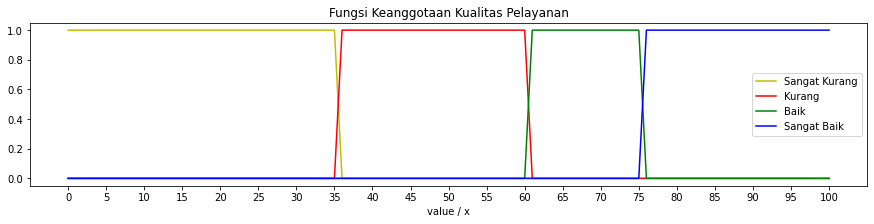

In [553]:
plt.figure(figsize=(15, 3))
plt.title("Fungsi Keanggotaan Kualitas Pelayanan")

plt.plot(range(101), [fuzzy_pelayanan(x)['Sangat Kurang'] for x in range(101)], 'y')
plt.plot(range(101), [fuzzy_pelayanan(x)['Kurang'] for x in range(101)], 'r')
plt.plot(range(101), [fuzzy_pelayanan(x)['Baik'] for x in range(101)], 'g')
plt.plot(range(101), [fuzzy_pelayanan(x)['Sangat Baik'] for x in range(101)], 'b')

plt.plot(0, 0, 'y', linewidth=1.5, label='Sangat Kurang')
plt.plot(0, 0, 'r', linewidth=1.5, label='Kurang')
plt.plot(0, 0, 'g', linewidth=1.5, label='Baik')
plt.plot(0, 0, 'b', linewidth=1.5, label='Sangat Baik')

plt.xticks(np.arange(0, 105, 5.0))
plt.xlabel("value / x")
plt.legend()
plt.show()

## **Proses Fuzzifikasi**

In [554]:
fuzzify = []

for pelayanan, makanan in zip(data['pelayanan'], data['makanan']):
    fuzzy = {'Pelayanan': 0, 'Makanan': 0}

    fuzzy['Pelayanan'] = fuzzy_pelayanan(pelayanan)
    fuzzy['Makanan'] = fuzzy_makanan(makanan)

    fuzzify.append(fuzzy)

In [555]:
print("Contoh Hasil Fuzzifikasi :\n")
for i in range(8):
    print("Pelayanan :", fuzzify[i]['Pelayanan'])
    print("Makanan   :", fuzzify[i]['Makanan'], end="\n\n")

Contoh Hasil Fuzzifikasi :

Pelayanan : {'Sangat Kurang': 0, 'Kurang': 1, 'Baik': 0, 'Sangat Baik': 0}
Makanan   : {'Tidak Enak': 0, 'Biasa': 0.0, 'Enak': 1, 'Sangat Enak': 0}

Pelayanan : {'Sangat Kurang': 0, 'Kurang': 1, 'Baik': 0, 'Sangat Baik': 0}
Makanan   : {'Tidak Enak': 1, 'Biasa': 0, 'Enak': 0, 'Sangat Enak': 0}

Pelayanan : {'Sangat Kurang': 0, 'Kurang': 0, 'Baik': 0, 'Sangat Baik': 1}
Makanan   : {'Tidak Enak': 1, 'Biasa': 0, 'Enak': 0, 'Sangat Enak': 0}

Pelayanan : {'Sangat Kurang': 0, 'Kurang': 1, 'Baik': 0, 'Sangat Baik': 0}
Makanan   : {'Tidak Enak': 0.0, 'Biasa': 1, 'Enak': 0, 'Sangat Enak': 0}

Pelayanan : {'Sangat Kurang': 1, 'Kurang': 0, 'Baik': 0, 'Sangat Baik': 0}
Makanan   : {'Tidak Enak': 0.0, 'Biasa': 1, 'Enak': 0, 'Sangat Enak': 0}

Pelayanan : {'Sangat Kurang': 0, 'Kurang': 1, 'Baik': 0, 'Sangat Baik': 0}
Makanan   : {'Tidak Enak': 0, 'Biasa': 0, 'Enak': 0, 'Sangat Enak': 1}

Pelayanan : {'Sangat Kurang': 0, 'Kurang': 0.0, 'Baik': 1, 'Sangat Baik': 0}
Makanan

# **Inferensi**

## **Fuzzy Set Rules (Disjungsi)**

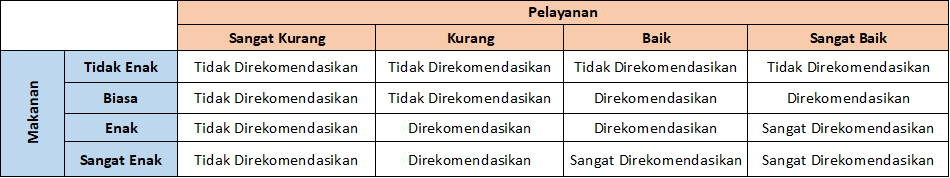

In [556]:
# Untuk setiap rules merupakan Disjungsi.
# Contoh: IF Makanan = Tidak Enak Λ Pelayanan = Sangat Kurang THEN Status = Tidak Direkomendasikan

fuzzy_set_rules = {
    ('Tidak Enak', 'Sangat Kurang') : 'Tidak Direkomendasikan',
    ('Tidak Enak', 'Kurang') : 'Tidak Direkomendasikan',
    ('Tidak Enak', 'Baik') : 'Tidak Direkomendasikan',
    ('Tidak Enak', 'Sangat Baik') : 'Tidak Direkomendasikan',
    ('Biasa', 'Sangat Kurang') : 'Tidak Direkomendasikan',
    ('Biasa', 'Kurang') : 'Tidak Direkomendasikan',
    ('Biasa', 'Baik') : 'Direkomendasikan',
    ('Biasa', 'Sangat Baik') : 'Direkomendasikan',
    ('Enak', 'Sangat Kurang') : 'Tidak Direkomendasikan',
    ('Enak', 'Kurang') : 'Direkomendasikan',
    ('Enak', 'Baik') : 'Direkomendasikan',
    ('Enak', 'Sangat Baik') : 'Sangat Direkomendasikan',
    ('Sangat Enak', 'Sangat Kurang') : 'Tidak Direkomendasikan',
    ('Sangat Enak', 'Kurang') : 'Direkomendasikan',
    ('Sangat Enak', 'Baik') : 'Sangat Direkomendasikan',
    ('Sangat Enak', 'Sangat Baik') : 'Sangat Direkomendasikan',
}

## **Proses Inferensi**

In [557]:
inference_result = []

def inference(fuzzed):
    result = {'Tidak Direkomendasikan': 0, "Direkomendasikan": 0, "Sangat Direkomendasikan": 0}

    for Pelayanan in fuzzed['Pelayanan'].keys():
        for Makanan in fuzzed['Makanan'].keys():
            min_value = min(fuzzed['Makanan'][Makanan], fuzzed['Pelayanan'][Pelayanan])

            # Proses Disjunction Sesuai Fuzzy Rules pada variabel fuzzy_set_rules
            output = fuzzy_set_rules[(Makanan, Pelayanan)]

            if min_value > result[output]:
               result[output] = min_value

    return result

In [558]:
for fuzzed in fuzzify:
    inference_result.append(inference(fuzzed))

print("Contoh Hasil Inferensi :\n")
for i in range(10):
    print(inference_result[i])

Contoh Hasil Inferensi :

{'Tidak Direkomendasikan': 0, 'Direkomendasikan': 1, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 1, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 1, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 1, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 1, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 0, 'Direkomendasikan': 1, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 0, 'Direkomendasikan': 1, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 1, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 1, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 0, 'Direkomendasikan': 1.0, 'Sangat Direkomendasikan': 0}


# **Defuzzifikasi**

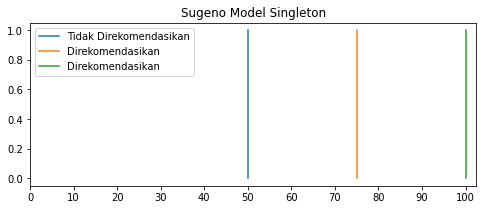

In [559]:
plt.figure(figsize=(8, 3))
plt.title("Sugeno Model Singleton")

plt.plot([50, 50], [0, 1], label="Tidak Direkomendasikan")
plt.plot([75, 75], [0, 1], label="Direkomendasikan")
plt.plot([100, 100], [0, 1], label="Direkomendasikan")
plt.xticks(np.arange(0, 110, 10.0))
plt.legend()
plt.show()

In [560]:
deffuzy = {'Tidak Direkomendasikan': 50, "Direkomendasikan": 75, "Sangat Direkomendasikan": 100}

def defuzzification(inference, deffuzy):
    numerator, denominator = 0, 0
    
    for output in deffuzy.keys():
        numerator += inference[output] * deffuzy[output]
        denominator += inference[output]
        
    return numerator/denominator

final = []

for inference in inference_result:
    final.append(defuzzification(inference, deffuzy)) 

In [561]:
print("Contoh Hasil Defuzifikasi :")
for i in range(25):
    print(final[i], end=", ")   

Contoh Hasil Defuzifikasi :
75.0, 50.0, 50.0, 50.0, 50.0, 75.0, 75.0, 50.0, 50.0, 75.0, 50.0, 75.0, 50.0, 50.0, 75.0, 75.0, 50.0, 50.0, 50.0, 75.0, 50.0, 100.0, 50.0, 100.0, 100.0, 

# **Hasil**

In [562]:
data['result'] = final
data = data.sort_values(by='result', ascending=False)[:10]

data['id'].to_excel('peringkat.xls', index=False, header=False)  
data

,id,pelayanan,makanan,result
23,24,100,9,100.0
41,42,94,10,100.0
24,25,61,10,100.0
30,31,74,9,100.0
78,79,87,9,100.0
69,70,78,8,100.0
68,69,86,10,100.0
62,63,78,7,100.0
21,22,79,9,100.0
53,54,64,10,100.0
